1. 目前可以实现高斯过程回归的工具有很多。尝试搜索你熟悉的统计软件（R语言，python，甚至是MATLAB等）
可以实现高斯过程回归的扩展包，实现一个简单的高斯过程回归

In [1]:
#加载需要的工具包
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
#设置随机因子
np.random.seed(1)

In [3]:
def f(x):
    """定义需要预测的函数"""
    return x * np.sin(x)

In [5]:
#定义初始已知点
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
y = f(X).ravel()
print(X.shape)

(6, 1)


In [7]:
#定义需要预测的点，方便画图
x = np.atleast_2d(np.linspace(0, 10, 1000)).T


In [6]:
#定义核函数和高斯过程
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [8]:
#拟合高斯过程回归
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [9]:
#预测
y_pred, sigma = gp.predict(x, return_std=True)

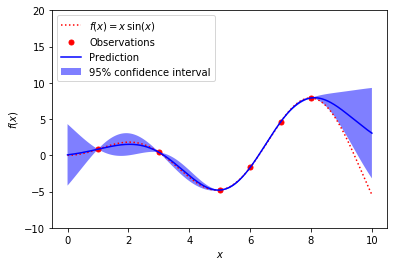

(2000, 1)
(2000,)


In [13]:
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()
xx=np.concatenate([x, x[::-1]])
yy=np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]])
print(xx.shape)
print(yy.shape)

In [11]:
#考虑有噪声的情况
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

In [12]:
#给y值增加一定的噪声
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

In [13]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

In [14]:
gp.fit(X, y)

GaussianProcessRegressor(alpha=array([  1.19066e+00,   3.29427e+01,   2.26479e+00,   2.98839e+01,
         2.66155e-01,   4.25430e-01,   1.50568e+00,   2.98565e-01,
         1.99813e-02,   1.07644e-02,   1.83527e-02,   2.36557e-01,
         9.04941e-01,   6.51187e-02,   2.79164e-02,   1.44247e-02,
         2.81258e-02,   4.24212e-02,   5.50023e+00,   3.45427e-01]),
             copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [15]:
y_pred, sigma = gp.predict(x, return_std=True)

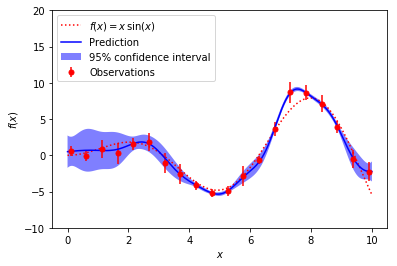

In [16]:
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [1]:
#读取数据
import pandas as pd
filename = 'd:/data/bankloan.xls'
data = pd.read_excel(filename)
data.head()


,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [20]:
data.describe()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987568,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


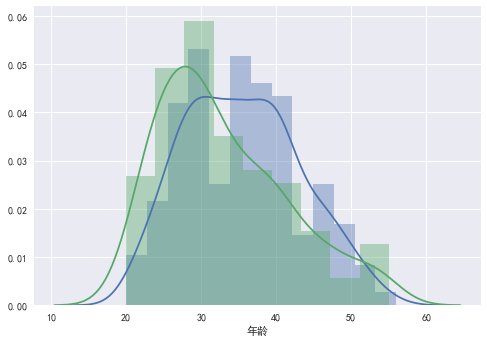

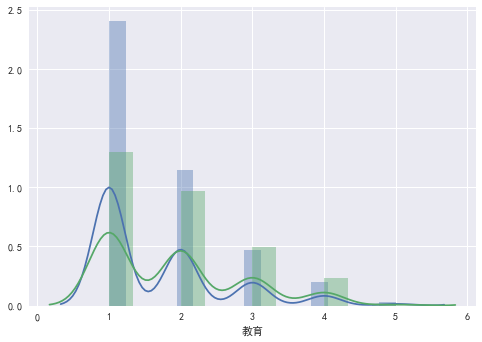

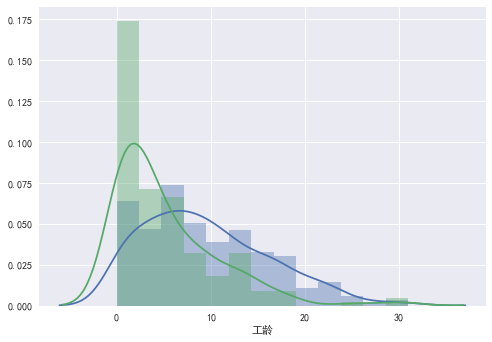

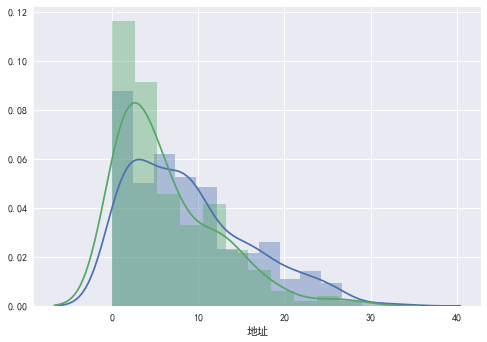

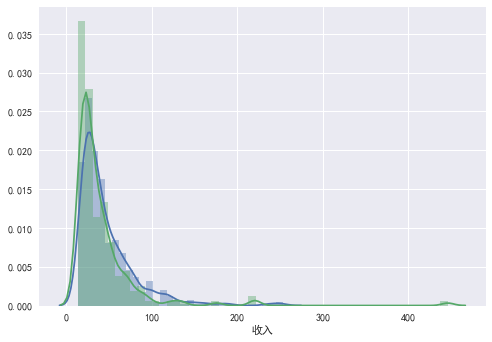

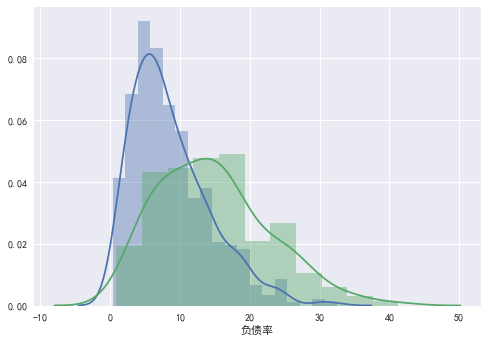

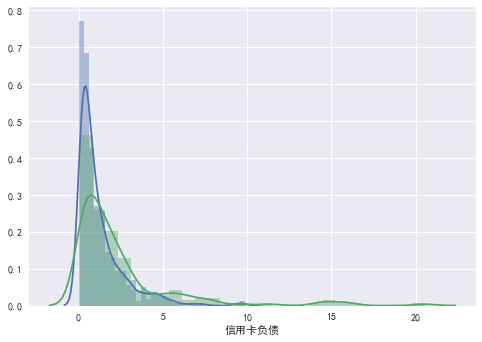

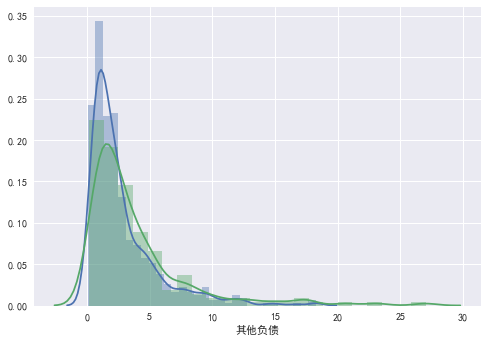

In [24]:
for i in data.columns[:8]:
    sns.distplot(data[i][data[u'违约']==0])
    sns.distplot(data[i][data[u'违约']==1])
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False 
    plt.show() 

In [18]:
x = data.drop('违约',axis=1) # 舍弃违约列进行训练
y = data[['违约']] # y标签为‘违约’列

In [48]:
train_X,test_X, train_y, test_y = train_test_split(x,  y,  test_size = 0.2,  random_state = 0)  

In [49]:
import xgboost as xgb
dtrain = xgb.DMatrix(train_X,label=train_y)
dtest=xgb.DMatrix(test_X)

In [50]:
# specify parameters via map
param = {'max_depth': 6, 'eta': 0.8, 'silent': 1, 'objective': 'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)

In [51]:
# make prediction
preds = bst.predict(dtest)
preds

array([ 0.22918476,  0.81102848,  0.0892251 ,  0.71256685,  0.10220408,
        0.24426411,  0.30623832,  0.16143656,  0.10220263,  0.10220263,
        0.0892251 ,  0.77815443,  0.16461855,  0.22918476,  0.39651644,
        0.10865016,  0.52937073,  0.10865016,  0.70266032,  0.28687325,
        0.08464883,  0.12265211,  0.0892251 ,  0.09813253,  0.12516639,
        0.08464883,  0.71333551,  0.0892251 ,  0.31223664,  0.19008747,
        0.22918476,  0.7154085 ,  0.13730721,  0.13102733,  0.56633705,
        0.16461855,  0.17497584,  0.66423416,  0.10335543,  0.22918476,
        0.08464883,  0.09938531,  0.12265211,  0.11812163,  0.65261608,
        0.85631752,  0.52945703,  0.23377572,  0.16461855,  0.24426411,
        0.78522211,  0.0892251 ,  0.16461855,  0.31223664,  0.0892251 ,
        0.36456144,  0.0892251 ,  0.08464883,  0.71333551,  0.0892251 ,
        0.18822123,  0.2772443 ,  0.30903572,  0.31461772,  0.19325198,
        0.0892251 ,  0.22276847,  0.10335543,  0.65261608,  0.10

In [52]:
preds[preds > 0.5] = 1  
preds[~(preds> 0.5)] = 0 

In [55]:
result=(preds==test_y['违约'])

In [56]:
np.mean(result)

0.76428571428571423

In [57]:
def show_accuracy(a, b):  
    acc =(a == b) 
    acc_rate = 100 * float(acc.sum()) / a.size  
    return acc_rate  

In [59]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=100)  
rfc.fit(train_X, train_y)  
y_hat = rfc.predict(test_X)  
rfc_rate = show_accuracy(y_hat, test_y['违约'])  
print(rfc_rate)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


71.42857142857143


In [60]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(penalty='l2')  
lr.fit(train_X, train_y)  
y_hat = lr.predict(test_X)  
lr_rate = show_accuracy(y_hat, test_y['违约']) 
print(lr_rate)

78.57142857142857


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
